In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [298]:
# Load the data
'''
image_name,BBox_xmin,BBox_ymin,BBox_xmax,BBox_ymax,Color
1209/BO00002-1.jpg,117,114,476,556,15
1209/BO00003-1.jpg,62,212,372,544,15
1209/BO00004-1.jpg,159,17,484,395,15
1209/BO00005-1.jpg,51,54,561,441,15
'''
train_df = pd.read_csv('./Dataset/Fashion-How24_sub2_train.csv')
val_df = pd.read_csv('./Dataset/Fashion-How24_sub2_val.csv')

In [299]:
train_df.head()

,image_name,BBox_xmin,BBox_ymin,BBox_xmax,BBox_ymax,Color
0,1209/BO00002-1.jpg,117,114,476,556,15
1,1209/BO00003-1.jpg,62,212,372,544,15
2,1209/BO00004-1.jpg,159,17,484,395,15
3,1209/BO00005-1.jpg,51,54,561,441,15
4,1209/BO00006-1.jpg,2,38,678,870,17


In [300]:
val_df.head()

,image_name,BBox_xmin,BBox_ymin,BBox_xmax,BBox_ymax,Color
0,1209/BO00041-1.jpg,61,2,477,418,17
1,1209/BO00046-1.jpg,119,74,630,487,0
2,1209/BO00051-1.jpg,142,44,611,449,0
3,1209/BO00053-2.jpg,178,20,472,440,11
4,1209/BO00092-1.jpg,152,210,433,533,15


In [4]:
import cv2
import os

PATH = './Dataset/'
def show_image(df, idx, type='train'):
    # Load the image
    image_path = os.path.join(PATH,type, df.iloc[idx]['image_name'])
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Get the bounding box
    BBox_xmin = df.iloc[idx]['BBox_xmin']
    BBox_ymin = df.iloc[idx]['BBox_ymin']
    BBox_xmax = df.iloc[idx]['BBox_xmax']
    BBox_ymax = df.iloc[idx]['BBox_ymax']

    # Draw the bounding box
    cv2.rectangle(image, (BBox_xmin, BBox_ymin), (BBox_xmax, BBox_ymax), (255, 0, 0), 2)

    # Display the image
    plt.imshow(image)
    plt.show()

    print('Color:', df.iloc[idx]['Color'])



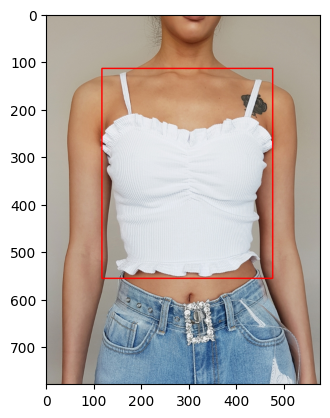

Color: 15


In [302]:
show_image(train_df, 0, 'train')

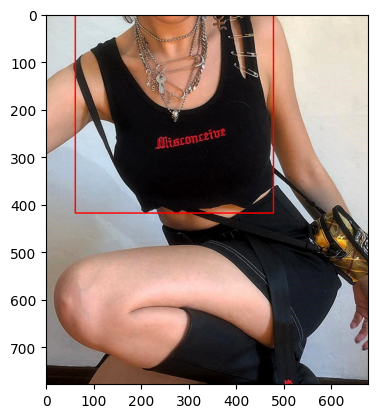

Color: 17


In [303]:
show_image(val_df, 0, 'val')

In [32]:
def show_distribution(df, type='Train'):
    color = df['Color'].value_counts()

    plt.figure(figsize=(10, 6))
    
    sns.barplot(x=color.index, y=color.values, palette='coolwarm', hue=color.index)
    plt.xlabel('Color')
    plt.ylabel('Count')

    for i in range(len(color)):
        plt.text(color.index[i], color.values[i] + 0.5, str(color.values[i]), ha = 'center')

    plt.title(type + ' dataset Color Distribution')
    plt.show()

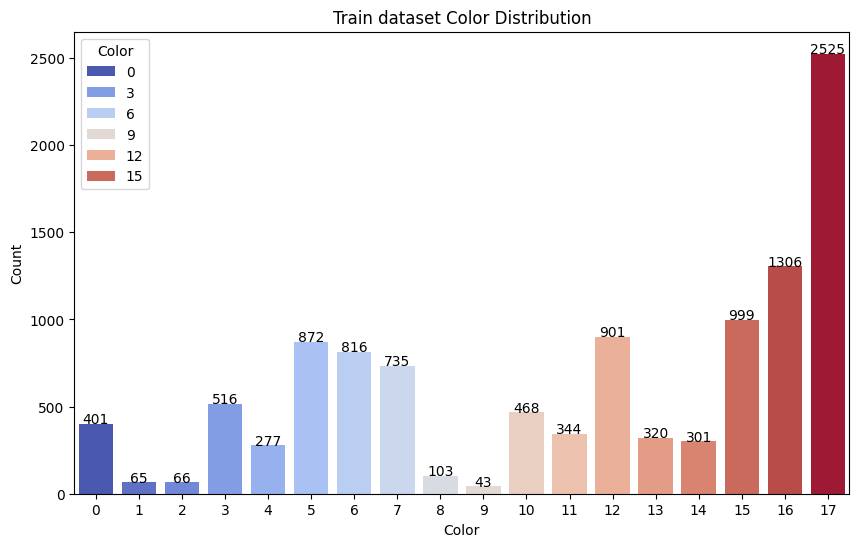

In [305]:
show_distribution(train_df, 'Train')

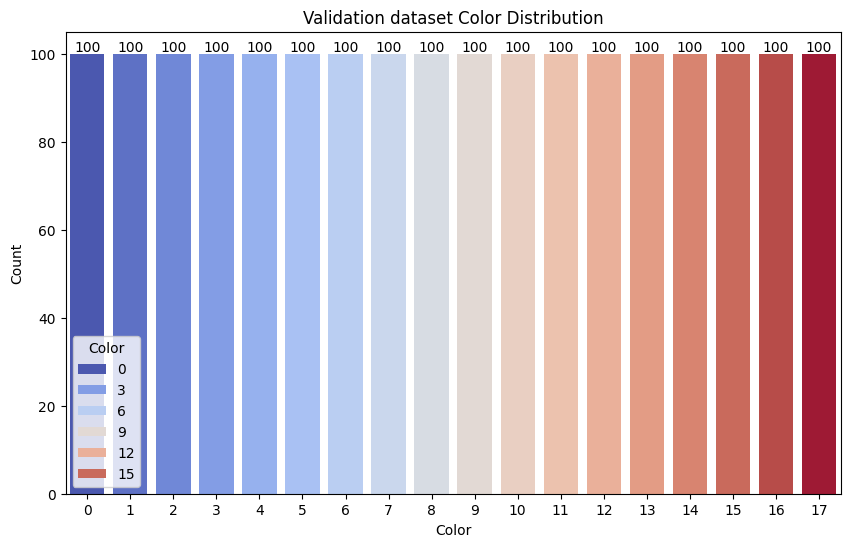

In [306]:
show_distribution(val_df, 'Validation')

In [307]:
val_df['Color'].value_counts()

Color
17    100
0     100
5     100
6     100
2     100
4     100
12    100
10    100
16    100
14    100
8     100
13    100
1     100
7     100
3     100
15    100
11    100
9     100
Name: count, dtype: int64

## Train & Val dataset 합치기

In [308]:
if not os.path.exists('./Dataset/train+val'):
    os.mkdir('./Dataset/train+val')
    
os.system('cp -r ./Dataset/train/* ./Dataset/train+val/')
os.system('cp -r ./Dataset/val/* ./Dataset/train+val/')


0

In [309]:
# Concatenate the train and validation dataframes
train_val_df = pd.concat([train_df, val_df], ignore_index=True)
train_val_df.to_csv('./Dataset/Fashion-How24_sub2_train+val.csv', index=False)

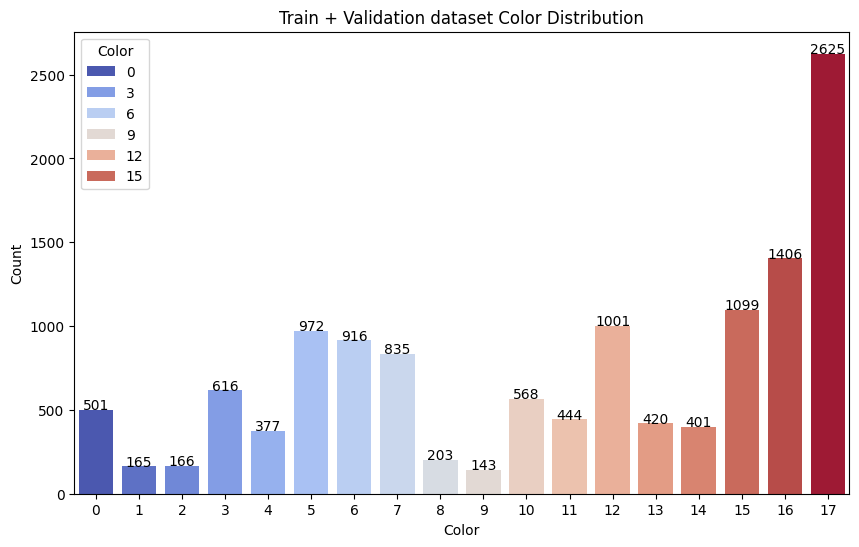

In [310]:
show_distribution(train_val_df, 'Train + Validation')

In [200]:
!pip install albumentations


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [311]:
import albumentations as A

def augment_and_show(aug, image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = aug(image=image)['image']

    plt.figure(figsize=(8, 8))
    plt.axis('off')
    plt.imshow(image)
    plt.show()
    

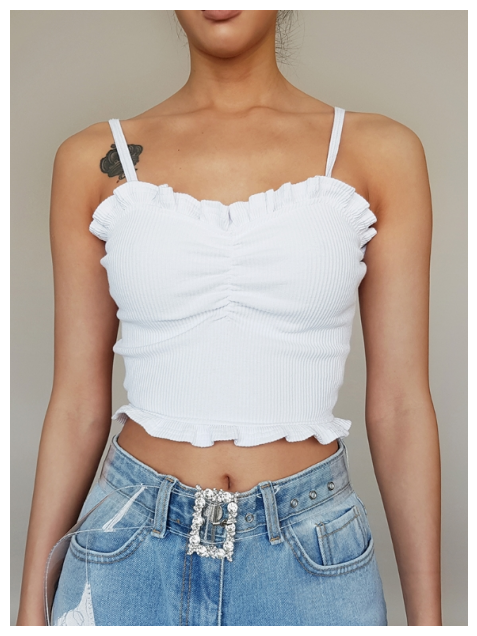

In [312]:
augment_and_show(A.HorizontalFlip(p=1), cv2.imread('./Dataset/train+val/1209/BO00002-1.jpg'))

In [33]:
# Distribution of the colors each of the cloth type

def make_dataframe(df):
    # Extract the cloth type from the image_name
    df['Cloth_Type'] = df['image_name'].apply(lambda x: x.split('/')[0].split('-')[0])

    # Get the count of each color for each cloth type
    color_count = df.groupby(['Cloth_Type', 'Color']).size().unstack().fillna(0)
    total = color_count.sum(axis=1)

    color_count['total'] = total
    color_count = color_count.sort_values(by='total', ascending=False)

    return color_count

In [314]:
new_df = make_dataframe(train_val_df)
new_df

Color,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,total
Cloth_Type,,,,,,,,,,,,,,,,,,,
1209,72.0,18.0,20.0,66.0,38.0,35.0,56.0,37.0,23.0,7.0,45.0,58.0,70.0,48.0,32.0,213.0,98.0,386.0,1322.0
2VEST 2019,19.0,6.0,3.0,40.0,20.0,114.0,86.0,118.0,6.0,11.0,23.0,12.0,88.0,17.0,28.0,57.0,166.0,183.0,997.0
2pants 2019,14.0,8.0,12.0,21.0,5.0,67.0,110.0,64.0,5.0,23.0,59.0,43.0,52.0,21.0,18.0,66.0,117.0,285.0,990.0
2KINT,47.0,11.0,27.0,70.0,33.0,61.0,29.0,51.0,30.0,5.0,44.0,54.0,65.0,62.0,11.0,126.0,92.0,143.0,961.0
2COAT 2019,38.0,8.0,16.0,29.0,25.0,119.0,148.0,51.0,11.0,21.0,26.0,18.0,92.0,12.0,25.0,12.0,136.0,143.0,930.0
2SKIRT2019,36.0,14.0,16.0,42.0,32.0,119.0,62.0,18.0,14.0,11.0,37.0,39.0,87.0,36.0,32.0,35.0,108.0,189.0,927.0
2CARDIGON 2019,50.0,19.0,8.0,34.0,35.0,87.0,55.0,61.0,13.0,7.0,17.0,30.0,81.0,39.0,27.0,62.0,145.0,155.0,925.0
2ONEPIECE 2019,21.0,7.0,11.0,38.0,32.0,78.0,81.0,48.0,14.0,13.0,65.0,25.0,115.0,38.0,28.0,34.0,90.0,178.0,916.0
2Sweater 2019,60.0,10.0,19.0,55.0,44.0,52.0,74.0,73.0,25.0,10.0,30.0,24.0,46.0,30.0,24.0,66.0,104.0,166.0,912.0


In [34]:
def plot_color_distribution(df):
    plt.figure(figsize=(15, 10))
    sns.heatmap(df.drop('total', axis=1), annot=True, fmt='g', cmap='coolwarm')
    plt.title('Color Distribution for each Cloth Type')
    plt.show()

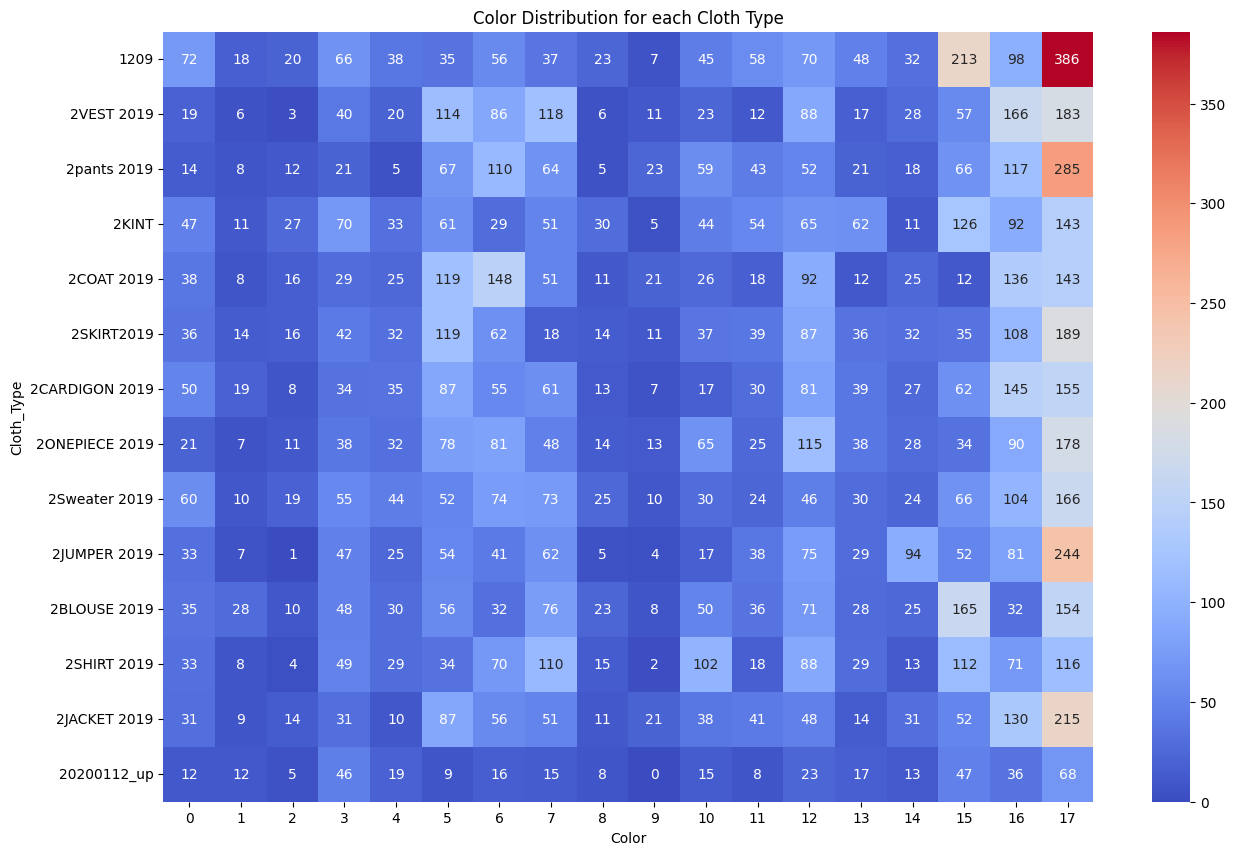

In [316]:
plot_color_distribution(new_df)

In [317]:
# Data Augmentation
def augment_and_save(aug, df, path, type='train+val'):
    length = len(df)
    for idx in range(len(df)):
        if df['Color'].iloc[idx] in [1, 2, 8, 9]:
            image_path = os.path.join(path, type, df['image_name'].iloc[idx])
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            BBox_xmin = df['BBox_xmin'].iloc[idx]
            BBox_ymin = df['BBox_ymin'].iloc[idx]
            BBox_xmax = df['BBox_xmax'].iloc[idx]
            BBox_ymax = df['BBox_ymax'].iloc[idx]

            # Apply the augmentation
            augmented = aug(image=image, bboxes=[[BBox_xmin, BBox_ymin, BBox_xmax, BBox_ymax]], category_id=[df['Color'].iloc[idx]])
            image = augmented['image']
            bboxes = augmented['bboxes']

            # Draw the bounding box on the image
            # cv2.rectangle(image, (int(bboxes[0][0]), int(bboxes[0][1])), (int(bboxes[0][2]), int(bboxes[0][3])), (255, 0, 0), 2)

            # Save the augmented image
            # Generate a new image path
            base_name = os.path.splitext(image_path)[0]  # Get the base name without the extension
            ext = os.path.splitext(image_path)[1]  # Get the file extension
            new_image_path = base_name + '_aug' + ext  # Create new path with '_aug' appended before the extension
            image_name = new_image_path.split('/')[-2:]

            cv2.imwrite(new_image_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
            df.loc[length + idx] = ['/'.join(image_name), int(bboxes[0][0]), int(bboxes[0][1]), int(bboxes[0][2]), int(bboxes[0][3]), df['Color'].iloc[idx], image_name[0]]

# Define the augmentation pipeline
aug = A.Compose([
    A.HorizontalFlip(p=1.0),  # Always apply horizontal flip
], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['category_id']))

In [318]:
augment_and_save(aug, train_val_df, './Dataset/', 'train+val')

In [319]:
train_val_df.tail()

,image_name,BBox_xmin,BBox_ymin,BBox_xmax,BBox_ymax,Color,Cloth_Type
25646,2SHIRT 2019/sh0303_W05_aug.jpg,267,221,594,768,9,2SHIRT 2019
25647,2BLOUSE 2019/bl0760-1_aug.png,129,36,356,367,9,2BLOUSE 2019
25648,2ONEPIECE 2019/on0421-1_aug.jpg,62,244,615,1032,9,2ONEPIECE 2019
25649,2COAT 2019/co0746-1_aug.jpg,87,129,590,791,9,2COAT 2019
25650,2VEST 2019/ve0776-1_aug.jpg,168,118,429,538,9,2VEST 2019


In [325]:
# Drop the Cloth_Type in the columns
train_val_df = train_val_df.drop(labels='Cloth_Type', axis=1)

train_val_df.to_csv('./Dataset/Fashion-How24_sub2_train+val_aug.csv', index=False)

KeyError: "['Cloth_Type'] not found in axis"

In [320]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [326]:
# straitified split
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(train_val_df, test_size=0.2, stratify=train_val_df['Color'], random_state=42)

In [327]:
train_val_df['Color'].value_counts()

Color
17    2625
16    1406
15    1099
12    1001
5      972
6      916
7      835
3      616
10     568
0      501
11     444
13     420
8      406
14     401
4      377
2      332
1      330
9      286
Name: count, dtype: int64

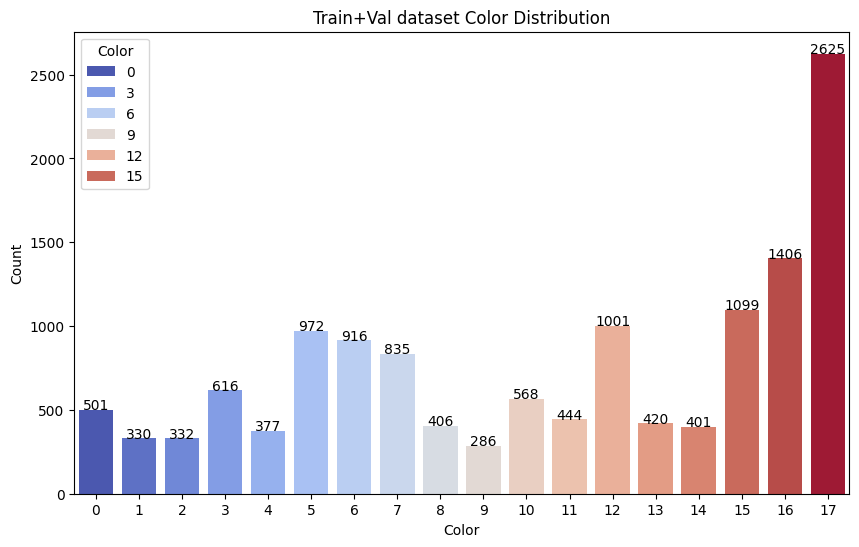

In [328]:
show_distribution(train_val_df, 'Train+Val')

In [329]:
train_df['Color'].value_counts()


Color
17    2100
16    1125
15     879
12     801
5      777
6      733
7      668
3      493
10     454
0      401
11     355
13     336
8      325
14     321
4      301
2      266
1      264
9      229
Name: count, dtype: int64

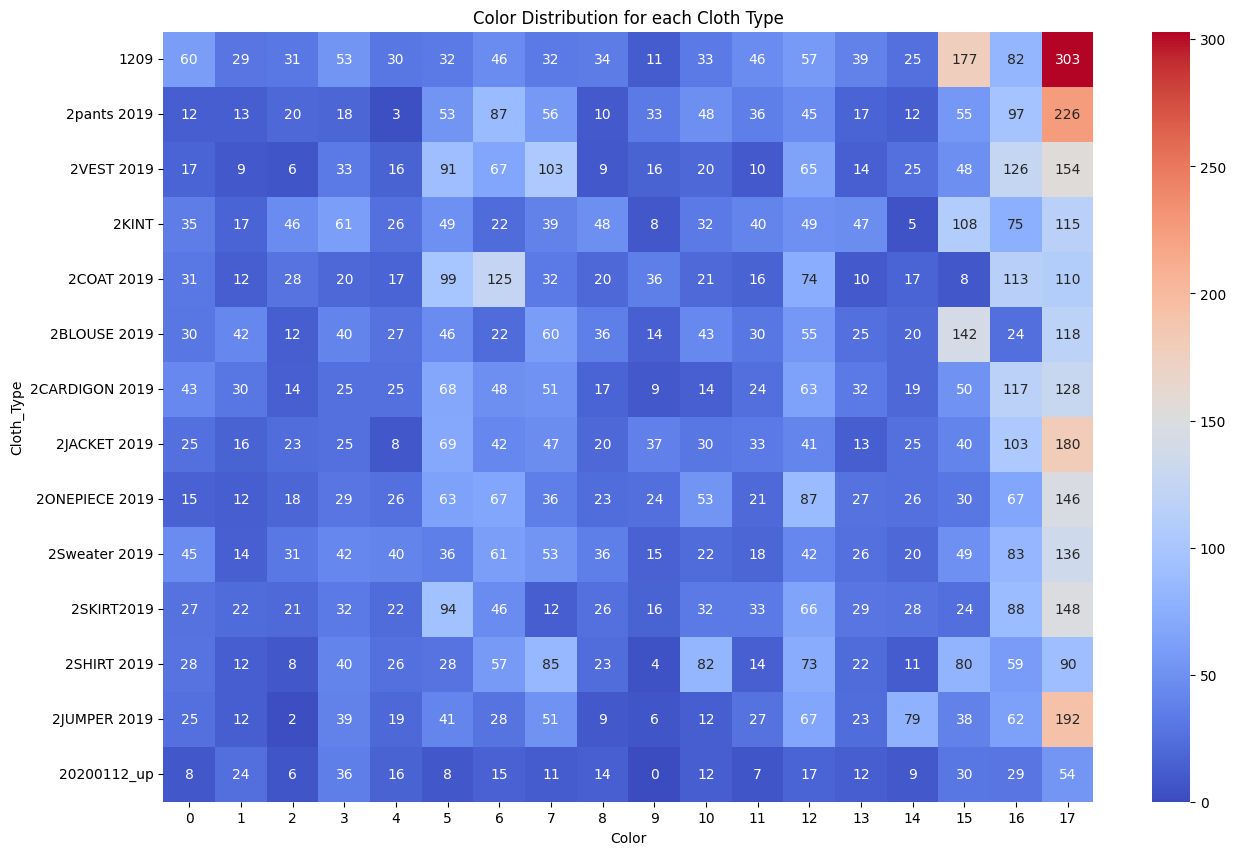

In [330]:
cloth_train_df = make_dataframe(train_df)
plot_color_distribution(cloth_train_df)

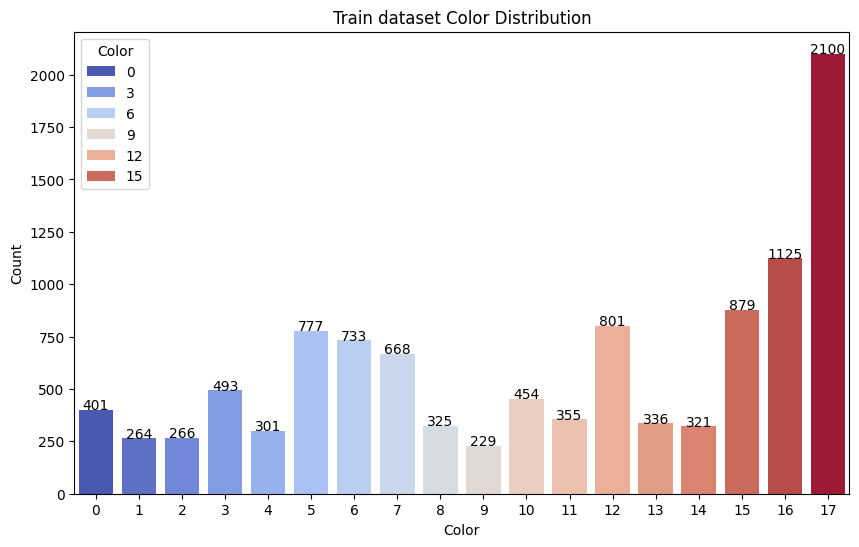

In [331]:
show_distribution(train_df)

In [332]:
train_df.to_csv('./Dataset/Fashion-How24_sub2_train_aug.csv', index=False)
val_df.to_csv('./Dataset/Fashion-How24_sub2_val_aug.csv', index=False)

In [3]:
train_val_df = pd.read_csv('./Dataset/Fashion-How24_sub2_train+val_aug.csv')

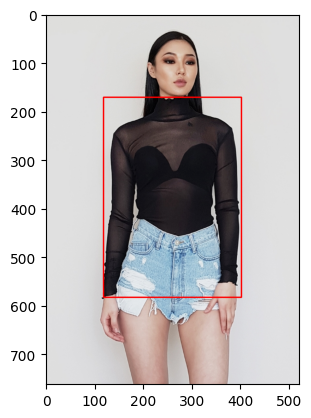

Color: 17
Image: 1209/BO00013-1.jpg


In [4]:
show_image(train_val_df, 10, 'train+val')
print('Image:', train_val_df.iloc[10]['image_name'])

In [ ]:
for i in range(len(train_val_df)):
    if train_val_df.iloc[i]['Color'] == 2:
        show_image(train_val_df, i, 'train+val')
        print('Image:', train_val_df.iloc[i]['image_name'])

In [5]:
train_val_df = pd.read_csv('./Dataset/Fashion-How24_sub2_train+val_aug.csv')

In [16]:
del_list = ['1209/BO00395-1.jpg', '20200112_up/BO01813-1.jpg', '2BLOUSE 2019/bl0607_W05.jpg', '2CARDIGON 2019/ca0453_W06.jpg', '2JACKET 2019/ja0428-1.jpg', '2JACKET 2019/ja0603-1.jpg', '2JACKET 2019/ja0784_W06.jpg', '2KINT/kn0142.jpg', '2KINT/kn0537-1.png', '2KINT/kn0705-1.jpg', '2KINT/kn0810-1.jpg', '2KINT/kn0997-1.jpg', 'SKIRT2019/793-1.jpg', '2Sweater 2019/sw0419-1.jpg', '2Sweater 2019/sw0879.jpg', '1209/BO00373-1.jpg', '1209/BT00184-1.jpg', '2CARDIGON 2019/ca0383_W05.jpg', '2COAT 2019/co0693.jpg', '2JACKET 2019/ja0158_W01.jpg', '2JACKET 2019/ja0971-1.jpg', '2KINT/kn0332-1.jpg', '2ONEPIECE 2019/on0235-1.jpg', '2ONEPIECE 2019/on0542-1.jpg', '2SKIRT2019/661-1.jpg', '2Sweater 2019/sw0869.jpg', '2BLOUSE 2019/bl0754-1.png', '2JACKET 2019/ja0341-1.jpg', '2SKIRT2019/803-1.jpg', '2KINT/kn0714-1.jpg', '20200112_up/BO01346-1.jpg', '2KINT/kn0262-1.jpg', 'BLOUSE 2019/bl0872-1.jpg', '2BLOUSE 2019/bl0430_W06.jpg', '2JACKET 2019/ja0413-1.jpg', '2SHIRT 2019/sh0733_W01.jpg', '2SKIRT2019/328-1.png', '2SKIRT2019/401-1.jpg', '2COAT 2019/co0292-1.jpg', '2ONEPIECE 2019/on0171-1.jpg', '2KINT/kn0820-2.jpg', '2KINT/kn1004-1.jpg', '2KINT/kn0804-1.jpg', '2JACKET 2019/ja0063_W05.jpg', '2KINT/kn0660-1.jpg']

In [17]:
for i in range(len(del_list)):
    aug_del = del_list[i].split('.')[0] + '_aug.' + del_list[i].split('.')[-1]
    del_list.append(aug_del)

In [18]:
del_list

['1209/BO00395-1.jpg',
 '20200112_up/BO01813-1.jpg',
 '2BLOUSE 2019/bl0607_W05.jpg',
 '2CARDIGON 2019/ca0453_W06.jpg',
 '2JACKET 2019/ja0428-1.jpg',
 '2JACKET 2019/ja0603-1.jpg',
 '2JACKET 2019/ja0784_W06.jpg',
 '2KINT/kn0142.jpg',
 '2KINT/kn0537-1.png',
 '2KINT/kn0705-1.jpg',
 '2KINT/kn0810-1.jpg',
 '2KINT/kn0997-1.jpg',
 'SKIRT2019/793-1.jpg',
 '2Sweater 2019/sw0419-1.jpg',
 '2Sweater 2019/sw0879.jpg',
 '1209/BO00373-1.jpg',
 '1209/BT00184-1.jpg',
 '2CARDIGON 2019/ca0383_W05.jpg',
 '2COAT 2019/co0693.jpg',
 '2JACKET 2019/ja0158_W01.jpg',
 '2JACKET 2019/ja0971-1.jpg',
 '2KINT/kn0332-1.jpg',
 '2ONEPIECE 2019/on0235-1.jpg',
 '2ONEPIECE 2019/on0542-1.jpg',
 '2SKIRT2019/661-1.jpg',
 '2Sweater 2019/sw0869.jpg',
 '2BLOUSE 2019/bl0754-1.png',
 '2JACKET 2019/ja0341-1.jpg',
 '2SKIRT2019/803-1.jpg',
 '2KINT/kn0714-1.jpg',
 '20200112_up/BO01346-1.jpg',
 '2KINT/kn0262-1.jpg',
 'BLOUSE 2019/bl0872-1.jpg',
 '2BLOUSE 2019/bl0430_W06.jpg',
 '2JACKET 2019/ja0413-1.jpg',
 '2SHIRT 2019/sh0733_W01.jpg',


In [22]:
idx = 0
for _ in range(len(train_val_df)):
    if train_val_df.iloc[idx]['image_name'] in del_list:
        train_val_df.drop(labels=train_val_df.index[idx], inplace=True)
        continue
    idx += 1

In [23]:
train_val_df.to_csv('./Dataset/Fashion-How24_sub2_train+val_aug_cleansing.csv', index=False)

In [ ]:
for i in range(len(train_val_df)):
    if train_val_df.iloc[i]['Color'] == 9:
        show_image(train_val_df, i, 'train+val')
        print('Image:', train_val_df.iloc[i]['image_name'])

In [25]:
del_9_list = ['1209/BO00287-1.jpg', '2CARDIGON 2019/ca0162-1.jpg', '2CARDIGON 2019/ca0285_W05.jpg', '2COAT 2019/co0116.jpg', '2COAT 2019/co0522.jpg', '2JACKET 2019/ja0478-1.jpg', '2ONEPIECE 2019/on0042-1.jpg', '2JUMPER 2019/ju0884-1.jpg', '2ONEPIECE 2019/on0577-1.jpg', '2Sweater 2019/sw0190-1.jpg', '2Sweater 2019/sw0923.jpg', '2VEST 2019/ve0857-1.jpg', '2COAT 2019/co0527.jpg', '2JACKET 2019/ja0118_W05.jpg', '2JACKET 2019/ja0326-1.jpg', '2JUMPER 2019/ju0241-1.jpg', '2SKIRT2019/967-1.jpg', '2VEST 2019/ve0064-1.jpg', '2VEST 2019/ve0135-1.jpg', '2pants 2019/625_W06.jpg', '2pants 2019/426_W01.jpg', '2JACKET 2019/ja0567-1.jpg', '2COAT 2019/co0230.jpg', '2KINT/kn0107.jpg', '2JUMPER 2019/ju0498-1.jpg', '2BLOUSE 2019/bl0349_W01.jpg', '2CARDIGON 2019/ca0894-1.jpg', '1209/BO00835-1.jpg', '2COAT 2019/co0709.jpg', '2pants 2019/281-01.jpg', '2COAT 2019/co0495.jpg', '2JACKET 2019/ja0516-1.jpg', '2KINT/kn0032.jpg', '2pants 2019/760_W05.jpg', '1209/BO00040-1.jpg', '2COAT 2019/co0517.jpg', '2JACKET 2019/ja0410-1.jpg', '2SKIRT2019/452-01.jpg', '2JACKET 2019/ja0464_W06.jpg', '2VEST 2019/ve0839-1.jpg', '2JACKET 2019/ja0986-1.jpg', '2CARDIGON 2019/ca0580-1.jpg', '2SHIRT 2019/sh0835-1.jpg', '2BLOUSE 2019/bl0431-1.jpg', '2VEST 2019/ve0847-1.jpg', '2SKIRT2019/820-1.jpg', '2Sweater 2019/sw0206-1.jpg', '2SKIRT2019/520-10.jpg', '2Sweater 2019/sw0731-1.jpg', '2ONEPIECE 2019/on0504-1.jpg', '1209/BO00107-1.jpg', '2SHIRT 2019/sh0303_W05.jpg', '2VEST 2019/ve0776-1.jpg'] 

In [26]:
for i in range(len(del_9_list)):
    aug_del = del_9_list[i].split('.')[0] + '_aug.' + del_9_list[i].split('.')[-1]
    del_9_list.append(aug_del)

In [27]:
del_9_list

['1209/BO00287-1.jpg',
 '2CARDIGON 2019/ca0162-1.jpg',
 '2CARDIGON 2019/ca0285_W05.jpg',
 '2COAT 2019/co0116.jpg',
 '2COAT 2019/co0522.jpg',
 '2JACKET 2019/ja0478-1.jpg',
 '2ONEPIECE 2019/on0042-1.jpg',
 '2JUMPER 2019/ju0884-1.jpg',
 '2ONEPIECE 2019/on0577-1.jpg',
 '2Sweater 2019/sw0190-1.jpg',
 '2Sweater 2019/sw0923.jpg',
 '2VEST 2019/ve0857-1.jpg',
 '2COAT 2019/co0527.jpg',
 '2JACKET 2019/ja0118_W05.jpg',
 '2JACKET 2019/ja0326-1.jpg',
 '2JUMPER 2019/ju0241-1.jpg',
 '2SKIRT2019/967-1.jpg',
 '2VEST 2019/ve0064-1.jpg',
 '2VEST 2019/ve0135-1.jpg',
 '2pants 2019/625_W06.jpg',
 '2pants 2019/426_W01.jpg',
 '2JACKET 2019/ja0567-1.jpg',
 '2COAT 2019/co0230.jpg',
 '2KINT/kn0107.jpg',
 '2JUMPER 2019/ju0498-1.jpg',
 '2BLOUSE 2019/bl0349_W01.jpg',
 '2CARDIGON 2019/ca0894-1.jpg',
 '1209/BO00835-1.jpg',
 '2COAT 2019/co0709.jpg',
 '2pants 2019/281-01.jpg',
 '2COAT 2019/co0495.jpg',
 '2JACKET 2019/ja0516-1.jpg',
 '2KINT/kn0032.jpg',
 '2pants 2019/760_W05.jpg',
 '1209/BO00040-1.jpg',
 '2COAT 2019/co05

In [30]:
idx = 0
for _ in range(len(train_val_df)):
    if train_val_df.iloc[idx]['image_name'] in del_9_list:
        train_val_df.drop(labels=train_val_df.index[idx], inplace=True)
        continue
    idx += 1

In [31]:
train_val_df.to_csv('./Dataset/Fashion-How24_sub2_train+val_aug_cleansing.csv', index=False)

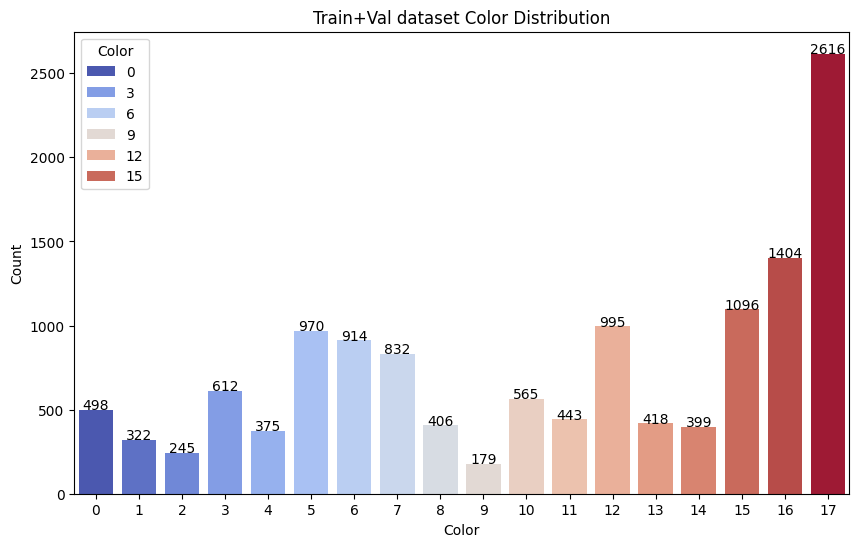

In [35]:
show_distribution(train_val_df, 'Train+Val')

In [36]:
new_train_val = make_dataframe(train_val_df)

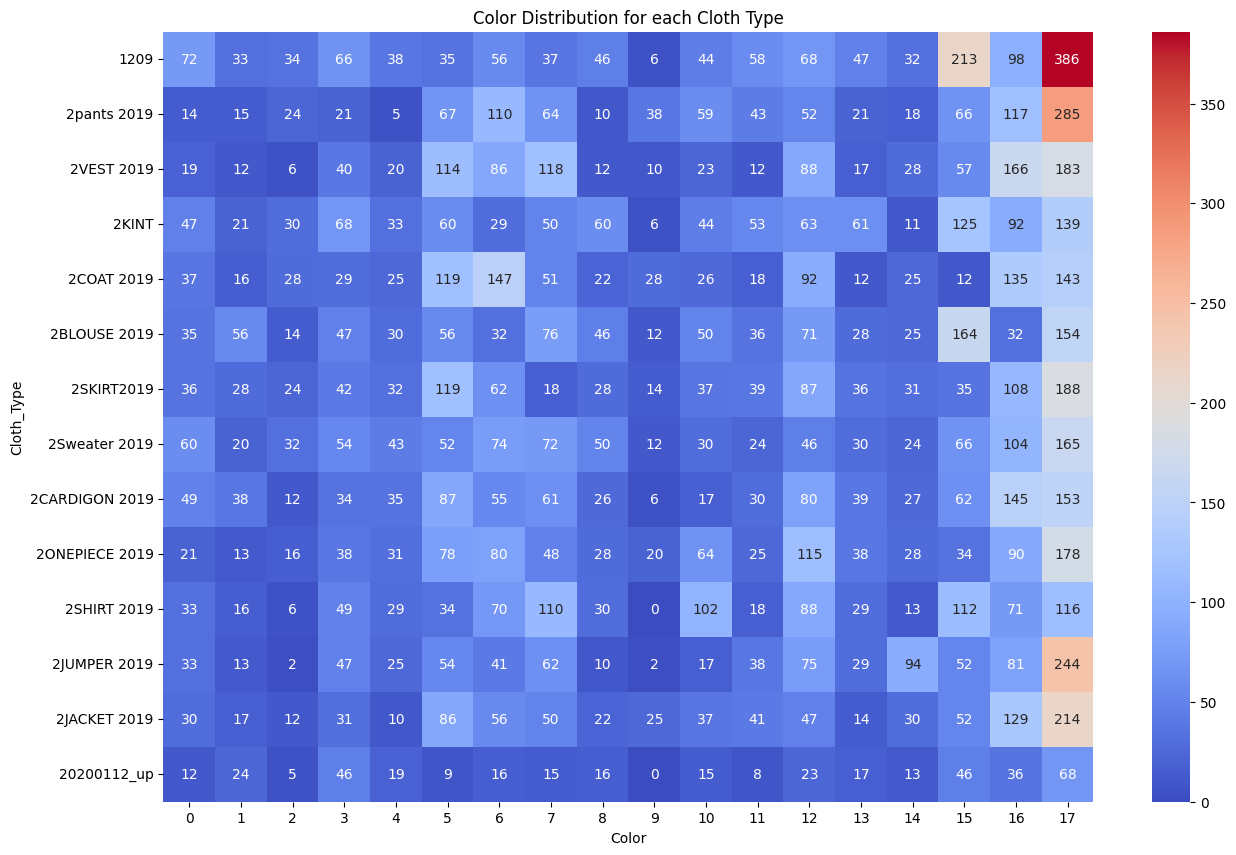

In [37]:
plot_color_distribution(new_train_val)

In [38]:
# straitified split
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(train_val_df, test_size=0.2, stratify=train_val_df['Color'], random_state=42)

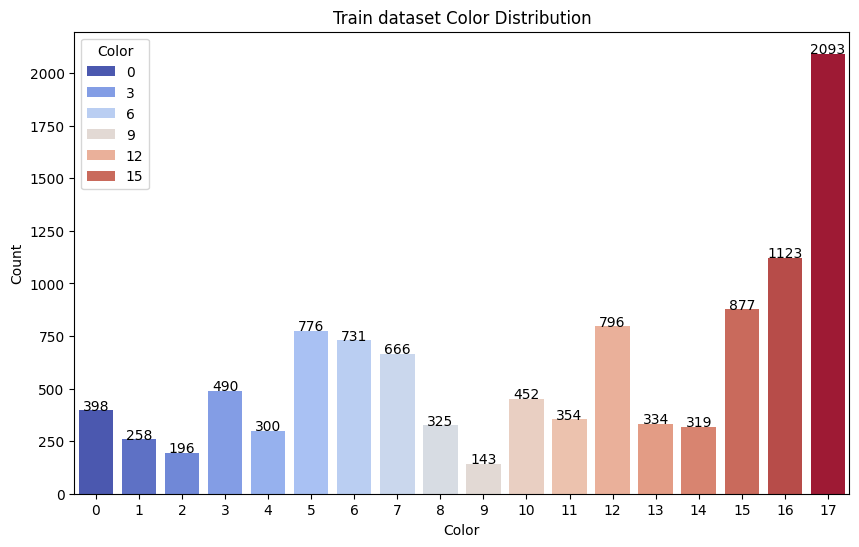

In [39]:
show_distribution(train_df, 'Train')

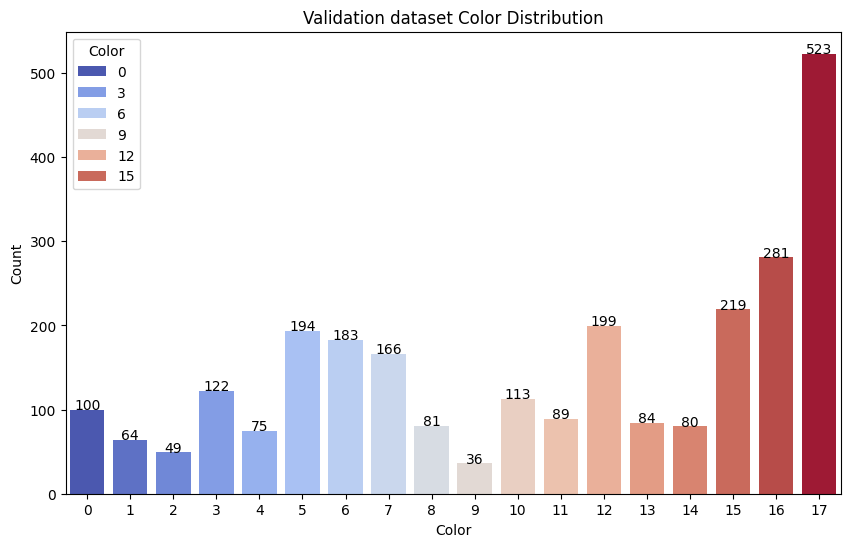

In [40]:
show_distribution(val_df, 'Validation')

In [41]:
train_df.to_csv('./Dataset/Fashion-How24_sub2_train_aug_cleansing.csv', index=False)
val_df.to_csv('./Dataset/Fashion-How24_sub2_val_aug_cleansing.csv', index=False)